<a href="https://colab.research.google.com/github/jamissonfreitas/IN1119/blob/master/analise_mes_ano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# População Brasileira

In [129]:
populacao_data = StringIO("""Ano;População
  2000;173448346
  2001;175885229
  2002;178276128
  2003;180619108
  2004;182911487
  2005;185150806
  2006;187335137
  2007;189462755
  2008;191532439
  2009;193543969
  2010;195497797
  2011;197397018
  2012;199242462
  2013;201032714
  2014;202768562
  2015;204450649
  2016;206081432
  2017;207660929
"""
)
df_populacao = pd.read_csv(populacao_data, index_col=0, sep=';')
df_populacao.index = df_populacao.index.astype(str)
df_populacao

,População
Ano,
2000,173448346
2001,175885229
2002,178276128
2003,180619108
2004,182911487
2005,185150806
2006,187335137
2007,189462755
2008,191532439


## População mensal

In [66]:
df_populacao_mensal = pd.read_csv('projecoes_das_populacoes_mensais_2000_2017_xls.csv', index_col=0, sep=';')
df_populacao_mensal= df_populacao_mensal.dropna()
df_populacao_mensal['Brasil'] = df_populacao_mensal['Brasil'].apply(lambda x: int(str(x).replace('.','')))
df_populacao_mensal['MES'] = df_populacao_mensal.index.map(lambda x: x.split('-')[1])
df_populacao_mensal['ANO'] = df_populacao_mensal.index.map(lambda x: '20'+x.split('-')[2])
df_populacao_mensal.sample(10)

,Brasil,MES,ANO
DATA,,,
1-fev-12,198633809,fev,2012
1-mai-08,191343268,mai,2008
1-mai-16,205968024,mai,2016
1-out-12,199849625,out,2012
1-jan-14,202063812,jan,2014
1-fev-09,192862621,fev,2009
1-jan-13,200299299,jan,2013
1-set-01,176498025,set,2001
1-set-09,194023193,set,2009


In [67]:
m = list(df_populacao_mensal.MES.unique())
meses = ['Janeiro',
         'Fevereiro',
         'Março',
         'Abril',
         'Maio',
         'Junho',
         'Julho',
         'Agosto',
         'Setembro',
         'Outubro',
         'Novembro',
         'Dezembro']
MES_DICT = dict(zip(m, meses, ))
MES_DICT

{'abr': 'Abril',
 'ago': 'Agosto',
 'dez': 'Dezembro',
 'fev': 'Fevereiro',
 'jan': 'Janeiro',
 'jul': 'Julho',
 'jun': 'Junho',
 'mai': 'Maio',
 'mar': 'Março',
 'nov': 'Novembro',
 'out': 'Outubro',
 'set': 'Setembro'}

In [68]:
df_populacao_mensal['MES'] = df_populacao_mensal['MES'].apply(lambda x : MES_DICT[x])
df_populacao_mensal = df_populacao_mensal.pivot(index='ANO', columns='MES', values='Brasil')
df_populacao_mensal = df_populacao_mensal[meses]
df_populacao_mensal

MES,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
ANO,,,,,,,,,,,,
2000,172411827,172619684,172827170,173034285,173241022,173447387,173653378,173858999,174064243,174269111,174473609,174677733
2001,174881480,175084860,175287860,175490490,175692745,175894625,176096134,176297266,176498025,176698411,176898423,177098057
2002,177297319,177496208,177694719,177892863,178090626,178288012,178485036,178681675,178877943,179073834,179269355,179464497
2003,179659266,179853661,180047681,180241323,180434595,180627489,180820008,181012154,181203921,181395317,181586339,181776982
2004,181967253,182157148,182346667,182535812,182724578,182912972,183100988,183288631,183475896,183662791,183849303,184035445
2005,184221208,184406597,184591613,184776247,184960508,185144393,185327905,185511035,185693795,185876175,186058179,186239811
2006,186421065,186601940,186782440,186962565,187142314,187321684,187500678,187679300,187857542,188035407,188212898,188390010
2007,188566744,188743105,188919085,189094694,189269923,189444772,189619251,189793348,189967069,190140416,190313382,190485971
2008,190658187,190830023,191001481,191172563,191343268,191513595,191683548,191853118,192022312,192191129,192359568,192527633


In [69]:
df_populacao_mensal.dtypes

MES
Janeiro      int64
Fevereiro    int64
Março        int64
Abril        int64
Maio         int64
Junho        int64
Julho        int64
Agosto       int64
Setembro     int64
Outubro      int64
Novembro     int64
Dezembro     int64
dtype: object

Text(0, 0.5, 'Número de habitantes')

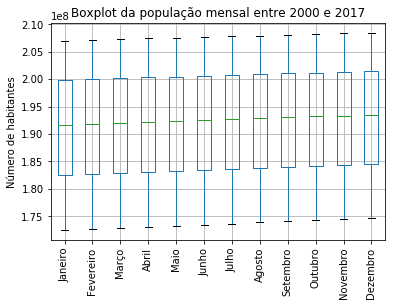

In [73]:
ax = df_populacao_mensal.boxplot(rot=90)
ax.set_title('Boxplot da população mensal entre 2000 e 2017')
ax.set_ylabel('Número de habitantes')

# Número de suicídios por mês

In [0]:
obitos_mes = StringIO("""
"Mes";"2000";"2001";"2002";"2003";"2004";"2005";"2006";"2007";"2008";"2009";"2010";"2011";"2012";"2013";"2014";"2015";"2016";"2017";"Total"
"Janeiro";610;684;650;683;714;751;791;786;817;825;845;817;877;918;928;1047;941;1059;14743
"Fevereiro";554;620;639;613;646;661;685;674;823;738;726;757;912;876;879;852;926;967;13548
"Março";585;691;676;699;698;705;803;791;824;812;801;845;839;934;956;947;929;1055;14590
"Abril";548;659;620;668;691;680;684;722;767;775;754;842;851;853;897;935;919;923;13788
"Maio";522;611;622;623;658;715;680;761;715;788;809;827;801;891;825;899;927;1029;13703
"Junho";520;641;563;610;629;637;627;713;714;714;702;755;767;826;802;867;879;932;12898
"Julho";525;620;603;594;575;685;748;689;757;743;745;805;840;797;753;851;925;938;13193
"Agosto";555;658;652;648;665;783;712;773;760;748;789;835;821;855;937;915;910;1071;14087
"Setembro";532;657;634;689;672;701;688;727;787;752;768;819;888;902;917;902;962;1135;14132
"Outubro";651;618;701;689;669;810;750;766;787;780;856;819;892;906;900;990;1047;1212;14843
"Novembro";555;610;660;673;684;704;703;693;749;839;794;800;878;838;915;921;1016;1063;14095
"Dezembro";621;669;706;672;716;718;768;773;828;860;859;931;955;937;944;1052;1052;1111;15172
"""
)

In [75]:
df_obitos = pd.read_csv(obitos_mes, index_col=0, sep=';')
del df_obitos['Total']
df_obitos

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Mes,,,,,,,,,,,,,,,,,,
Janeiro,610,684,650,683,714,751,791,786,817,825,845,817,877,918,928,1047,941,1059
Fevereiro,554,620,639,613,646,661,685,674,823,738,726,757,912,876,879,852,926,967
Março,585,691,676,699,698,705,803,791,824,812,801,845,839,934,956,947,929,1055
Abril,548,659,620,668,691,680,684,722,767,775,754,842,851,853,897,935,919,923
Maio,522,611,622,623,658,715,680,761,715,788,809,827,801,891,825,899,927,1029
Junho,520,641,563,610,629,637,627,713,714,714,702,755,767,826,802,867,879,932
Julho,525,620,603,594,575,685,748,689,757,743,745,805,840,797,753,851,925,938
Agosto,555,658,652,648,665,783,712,773,760,748,789,835,821,855,937,915,910,1071
Setembro,532,657,634,689,672,701,688,727,787,752,768,819,888,902,917,902,962,1135


Text(0, 0.5, 'Número de óbidos')

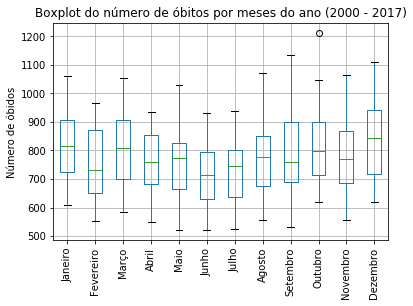

In [76]:
ax = df_obitos.T.boxplot(rot=90)
ax.set_title('Boxplot do número de óbitos por meses do ano (2000 - 2017)')
ax.set_ylabel('Número de óbidos')

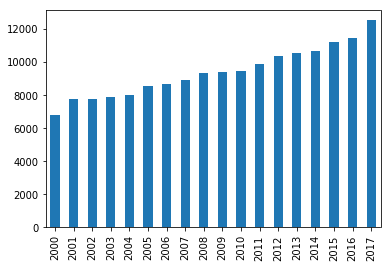

In [77]:
df_obitos.sum().plot.bar() # totais por ano

Text(0, 0.5, 'Proporção de óbidos por ano')

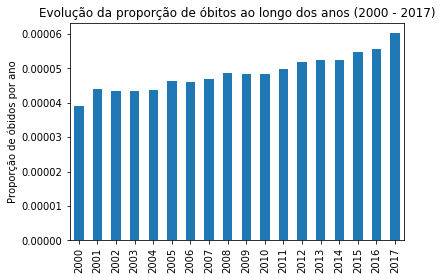

In [132]:
ax = df_obitos.sum().div(df_populacao['População']).plot.bar()
ax.set_title('Evolução da proporção de óbitos ao longo dos anos (2000 - 2017)')
ax.set_ylabel('Proporção de óbidos por ano')

Text(0, 0.5, 'Número de óbidos por mês')

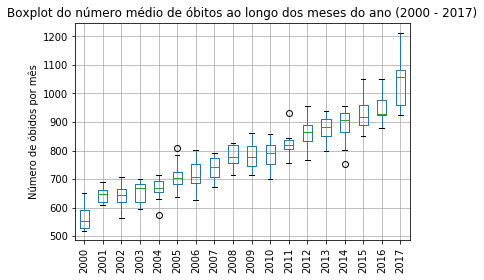

In [133]:
ax = df_obitos.boxplot(rot=90)
ax.set_title('Boxplot do número médio de óbitos ao longo dos meses do ano (2000 - 2017)')
ax.set_ylabel('Número de óbidos por mês')

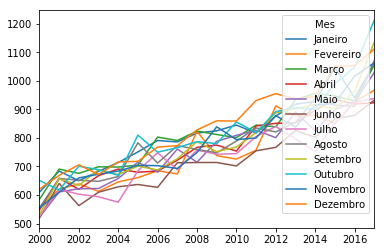

In [134]:
df_obitos.T.plot.line()

## Normalizar proporção (óbitos por mês divididos pela população no mês do respectivo ano)

In [135]:
df_obitos_proporcao = df_obitos.copy()
df_obitos_proporcao = df_obitos_proporcao.T.div(df_populacao_mensal)# .apply(lambda x: x/df_populacao_mensal.loc[x.index][x._name], axis=1)
df_obitos_proporcao = df_obitos_proporcao.multiply(100000) # por 100.000 habitates
df_obitos_proporcao

Mes,Janeiro,Fevereiro,Março,Abril,Maio,Junho,Julho,Agosto,Setembro,Outubro,Novembro,Dezembro
2000,0.353804,0.320937,0.338488,0.316700,0.301314,0.299803,0.302326,0.319224,0.305634,0.373560,0.318100,0.355512
2001,0.391122,0.354114,0.394209,0.375519,0.347766,0.364423,0.352080,0.373233,0.372242,0.349748,0.344831,0.377757
2002,0.366616,0.360008,0.380428,0.348524,0.349260,0.315781,0.337843,0.364895,0.354432,0.391459,0.368161,0.393393
2003,0.380164,0.340833,0.388230,0.370614,0.345277,0.337712,0.328503,0.357987,0.380235,0.379833,0.370623,0.369684
2004,0.392378,0.354639,0.382787,0.378556,0.360105,0.343879,0.314034,0.362816,0.366261,0.364255,0.372044,0.389055
2005,0.407662,0.358447,0.381924,0.368013,0.386569,0.344056,0.369615,0.422077,0.377503,0.435774,0.378376,0.385524
2006,0.424308,0.367092,0.429912,0.365849,0.363360,0.334718,0.398932,0.379371,0.366235,0.398861,0.373513,0.407665
2007,0.416829,0.357099,0.418698,0.381819,0.402071,0.376363,0.363360,0.407285,0.382698,0.402860,0.364136,0.405804
2008,0.428516,0.431274,0.431410,0.401208,0.373674,0.372819,0.394922,0.396136,0.409848,0.409488,0.389375,0.430068
2009,0.428137,0.382656,0.420661,0.401147,0.407525,0.368939,0.383596,0.385848,0.387583,0.401674,0.431692,0.442125


Text(0, 0.5, 'Número de óbidos por 100k habitantes')

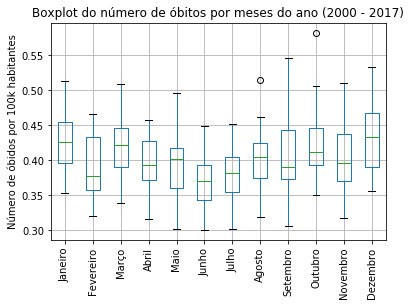

In [136]:
ax = df_obitos_proporcao.boxplot(rot=90)
ax.set_title('Boxplot do número de óbitos por meses do ano (2000 - 2017)')
ax.set_ylabel('Número de óbidos por 100k habitantes')

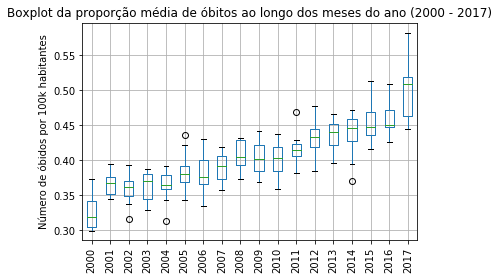

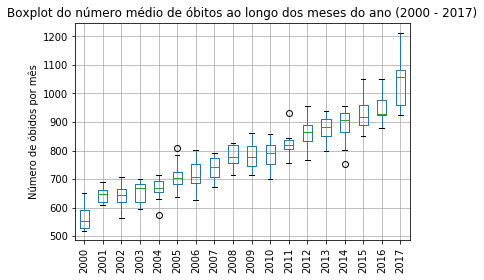

In [147]:
plt.figure(1)
ax = df_obitos_proporcao.T.boxplot(rot=90)
ax.set_title('Boxplot da proporção média de óbitos ao longo dos meses do ano (2000 - 2017)')
ax.set_ylabel('Número de óbidos por 100k habitantes')

plt.figure(2)
ax2 = df_obitos.boxplot(rot=90)
ax2.set_title('Boxplot do número médio de óbitos ao longo dos meses do ano (2000 - 2017)')
ax2.set_ylabel('Número de óbidos por mês')

plt.show()

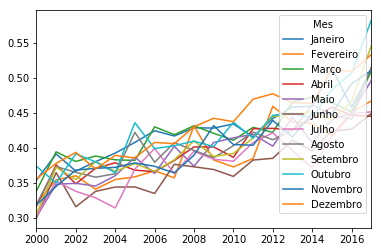

In [148]:
df_obitos_proporcao.plot.line()

# Salvar arquivos para testes estatísticos

In [149]:
df_obitos.T.to_csv('df_obitos.csv', sep=';')
df_obitos_proporcao.to_csv('df_obitos_proporcao.csv', sep=';')
df_obitos.sum(axis=1).to_csv('df_obitos_soma_por_mes.csv', sep=';')
df_obitos.sum(axis=0).to_csv('df_obitos_soma_por_ano.csv', sep=';')
df_populacao.to_csv('df_populacao.csv', sep=';')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  after removing the cwd from sys.path.
